# Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from functions import functions as f
# import model
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier

# Import data

In [2]:
df = pd.read_csv('../data/crashes_cleaned_ohe.csv')

In [3]:
df.head()

,posted_speed_limit,num_units,sex,age,weather_condition_blowing snow,weather_condition_clear,weather_condition_cloudy/overcast,weather_condition_fog/smoke/haze,weather_condition_freezing rain/drizzle,weather_condition_rain,...,crash_month_4,crash_month_5,crash_month_6,crash_month_7,crash_month_8,crash_month_9,crash_month_10,crash_month_11,crash_month_12,serious_accident
0,35,2,1,44.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,25,2,1,71.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,15,2,1,60.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,30,2,1,38.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30,2,1,52.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Train-Test Split

In [4]:
X = df.drop(['serious_accident'], axis=1)
y = df.serious_accident

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=200)

In [5]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

## Balance the imbalaced data

In [6]:
balance = SMOTE()
X_train_scaled_balanced, y_train_balanced = balance.fit_sample(X_train_scaled, y_train)

# Instatiate and Run Model

In [7]:
dtree = DecisionTreeClassifier(random_state=10, criterion="entropy")  
dtree.fit(X_train_scaled_balanced, y_train_balanced)

DecisionTreeClassifier(criterion='entropy', random_state=10)

# Predict

In [8]:
predictions_from_X_train = dtree.predict(X_train_scaled_balanced)
predictions_from_X_test = dtree.predict(X_test_scaled)

- X_train &rarr; X_train_scaled &rarr; **X_train_scaled_balanced**
    - used to create **predictions_from_X_train** which is to be compared to **y_train_balanced**
- X_test &rarr; **X_test_scaled**
    - used to create **predictions_from_X_test** which is to be compared to **y_test**
- y_train &rarr; **y_train_balanced**
- **y_test**

# Scoring

## Train Scoring

Accuracy: 100.0%
Precision: 100.0%
Recall: 99.9%
F1: 100.0%
Conufusion Matrix: 
[[43760     0]
 [   37 43723]]




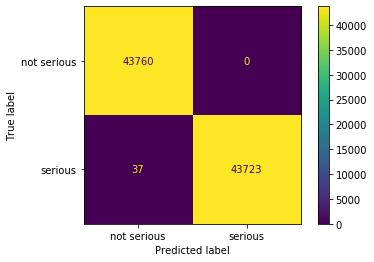

In [9]:
f.scoring(predictions_from_X_train, y_train_balanced, dtree, X_train_scaled_balanced)

## Test Scoring

Accuracy: 96.3%
Precision: 4.2%
Recall: 4.1%
F1: 4.1%
Conufusion Matrix: 
[[10719   207]
 [  209     9]]




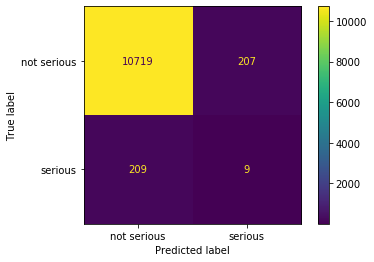

In [10]:
f.scoring(predictions_from_X_test, y_test, dtree, X_test_scaled)

In [11]:
print(y_train_balanced.shape)
predictions_from_X_test.shape

(87520,)


(11144,)

In [12]:
print(classification_report(y_test, predictions_from_X_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10926
           1       0.04      0.04      0.04       218

    accuracy                           0.96     11144
   macro avg       0.51      0.51      0.51     11144
weighted avg       0.96      0.96      0.96     11144



# Gradient Boosting

## Instatiate and Run Model

In [13]:
gdt = GradientBoostingClassifier()
gdt.fit(X_train_scaled_balanced, y_train_balanced)

GradientBoostingClassifier()

## Predict

In [14]:
gdt_predictions_from_X_train = gdt.predict(X_train_scaled_balanced)
gdt_predictions_from_X_test = gdt.predict(X_test_scaled)

### Variable Tracker

- X_train &rarr; X_train_scaled &rarr; **X_train_scaled_balanced**
    - used to create **gdt_predictions_from_X_train** which is to be compared to **y_train_balanced**
- X_test &rarr; **X_test_scaled**
    - used to create **gdt_predictions_from_X_test** which is to be compared to **y_test**
- y_train &rarr; **y_train_balanced**
- **y_test**

## Scoring

### Train Scoring

Accuracy: 96.1%
Precision: 99.9%
Recall: 92.3%
F1: 96.0%
Conufusion Matrix: 
[[43715    45]
 [ 3363 40397]]




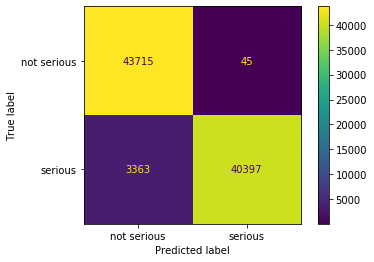

In [15]:
f.scoring(gdt_predictions_from_X_train, y_train_balanced, gdt, X_train_scaled_balanced)

### Test Scoring

Accuracy: 97.9%
Precision: 0.0%
Recall: 0.0%
F1: 0.0%
Conufusion Matrix: 
[[10908    18]
 [  218     0]]




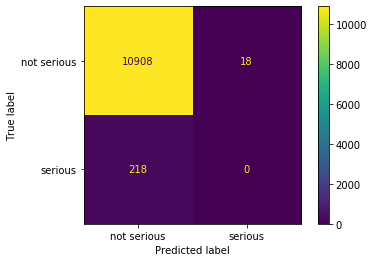

In [16]:
f.scoring(gdt_predictions_from_X_test, y_test, gdt, X_test_scaled)

## Add Scores to Scoring Dataframe

In [17]:
f.add_scores_to_scoring_df("Gradient Boosting", y_test, predictions_from_X_test, y_train_balanced, predictions_from_X_train)